<a href="https://colab.research.google.com/github/arjun37602/arjun37602.github.io/blob/master/Copy_of_Arjun_Nick_Final_Project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [ ]:
import numpy as np
import pandas as pd
import requests
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Data Analysis for Unemployment Rate

### Pulling and cleaning data from API

In [ ]:
series_dict = {'LNS14000003': 'White', 'LNS14000006': 'Black',
      'LNS14032183': 'Asian', 'LNS14000000':'All', 	'LNU04035243':'Native'}
series_list = list(series_dict.keys())

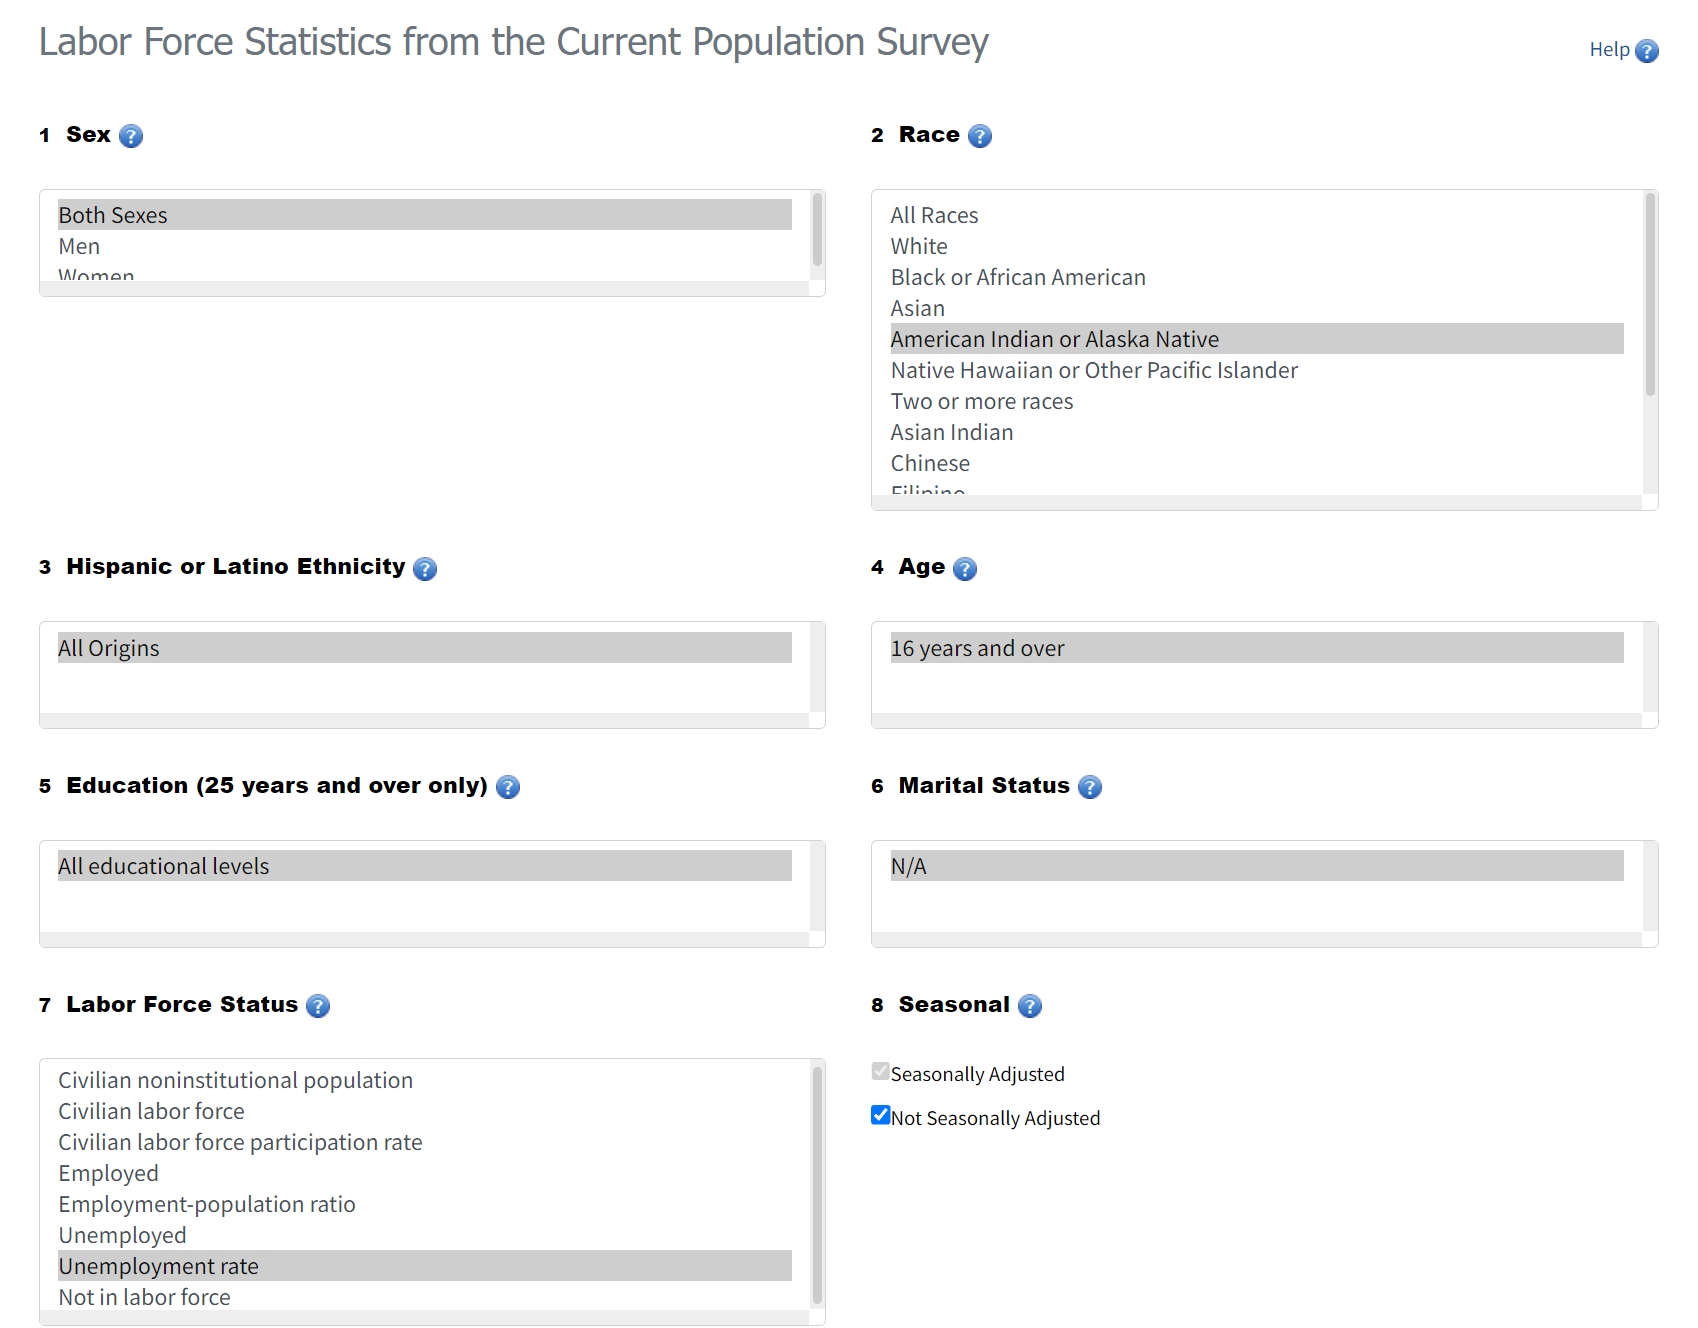

In [ ]:
def pull_data (series_id):
  # Specify json as content type to return
  headers = {'Content-type': 'application/json'}

  # Submit the list of series as data -> this is Nick's registration key 88ccd8fa0c414476b9fa708698f3d536
  data = json.dumps({"seriesid": [series_id],"startyear":"2016", "endyear":"2022", "registrationkey":"88ccd8fa0c414476b9fa708698f3d536"})

  # Post request for the data
  p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
  # change p into json type for further querying
  json_data = json.loads(p.text)
  
  # query data
  results = json_data["Results"]["series"][0]["data"]
  return results

In [ ]:
df = [pd.DataFrame() for i in range(5)] # range(5) because we have 5 survey IDs selected
data = pd.DataFrame()                 # create an empty DataFrame
for j in range(5):
  results = pull_data(series_list[j]) # api call for each survey ID
  for i in np.arange(0,6*12-4, 1):   # might need to change based on years you choose
    year = results[i]["year"]         
    month = results[i]["period"][1:]  # this is to delete the first letter "M" in every month data
    month_name = results[i]["periodName"]
    date_list = str(year + "-" + month + "-01" )
    unemployment_rate = results[i]["value"]
    df[j] = df[j].append({series_dict.get(series_list[j])+"_unemployment_rate": unemployment_rate},
                      ignore_index=True)
    if j == 0:
      data = data.append({"date_list": date_list},
                      ignore_index=True)
  
output = [data] + df 
output

[     date_list
 0   2022-11-01
 1   2022-10-01
 2   2022-09-01
 3   2022-08-01
 4   2022-07-01
 ..         ...
 63  2017-08-01
 64  2017-07-01
 65  2017-06-01
 66  2017-05-01
 67  2017-04-01
 
 [68 rows x 1 columns],    White_unemployment_rate
 0                      3.2
 1                      3.2
 2                      3.1
 3                      3.2
 4                      3.1
 ..                     ...
 63                     3.9
 64                     3.8
 65                     3.8
 66                     3.7
 67                     3.9
 
 [68 rows x 1 columns],    Black_unemployment_rate
 0                      5.7
 1                      5.9
 2                      5.8
 3                      6.4
 4                      6.0
 ..                     ...
 63                     7.7
 64                     7.3
 65                     6.9
 66                     7.7
 67                     7.7
 
 [68 rows x 1 columns],    Asian_unemployment_rate
 0                      2.7
 1   

In [ ]:
# use concat to combine the arrays in "output"
final_data = pd.concat(output, ignore_index=False, axis=1) # axis=1 to concat by columns; ignore_index=False to preserve the head of each column
final_data

,date_list,White_unemployment_rate,Black_unemployment_rate,Asian_unemployment_rate,All_unemployment_rate,Native_unemployment_rate
0,2022-11-01,3.2,5.7,2.7,3.7,7.7
1,2022-10-01,3.2,5.9,2.9,3.7,5.6
2,2022-09-01,3.1,5.8,2.5,3.5,7.1
3,2022-08-01,3.2,6.4,2.8,3.7,4.9
4,2022-07-01,3.1,6.0,2.6,3.5,3.9
...,...,...,...,...,...,...
63,2017-08-01,3.9,7.7,3.9,4.4,7.4
64,2017-07-01,3.8,7.3,3.7,4.3,7.6
65,2017-06-01,3.8,6.9,3.7,4.3,9.1
66,2017-05-01,3.7,7.7,3.6,4.4,8.8


In [ ]:
#Converting df into more suitable format for EDA

df1 = pd.DataFrame()
df1['unemployment_rate'] = final_data['White_unemployment_rate']
df1['rate'] = 'White_unemployment_rate'
df1['year'] = final_data['date_list']

df2 = pd.DataFrame()
df2['unemployment_rate'] = final_data['Black_unemployment_rate']
df2['rate'] = 'Black_unemployment_rate'
df2['year'] = final_data['date_list']

df3 = pd.DataFrame()
df3['unemployment_rate'] = final_data['Asian_unemployment_rate']
df3['rate'] = 'Asian_unemployment_rate'
df3['year'] = final_data['date_list']

df4 = pd.DataFrame()
df4['unemployment_rate'] = final_data['Native_unemployment_rate']
df4['rate'] = 'Native_unemployment_rate'
df4['year'] = final_data['date_list']

df5 = pd.DataFrame()
df5['unemployment_rate'] = final_data['All_unemployment_rate']
df5['rate'] = 'All_unemployment_rate'
df5['year'] = final_data['date_list']


plotting_data = pd.concat([df1, df2, df3, df4, df5], ignore_index = True)
plotting_data.reset_index()
plotting_data

,unemployment_rate,rate,year
0,3.2,White_unemployment_rate,2022-11-01
1,3.2,White_unemployment_rate,2022-10-01
2,3.1,White_unemployment_rate,2022-09-01
3,3.2,White_unemployment_rate,2022-08-01
4,3.1,White_unemployment_rate,2022-07-01
...,...,...,...
335,4.4,All_unemployment_rate,2017-08-01
336,4.3,All_unemployment_rate,2017-07-01
337,4.3,All_unemployment_rate,2017-06-01
338,4.4,All_unemployment_rate,2017-05-01


In [ ]:
convert_dict = {'unemployment_rate': float,
                'rate': str,
                             }
 
plotting_data = plotting_data.astype(convert_dict)
# plotting_data['year']= pd.to_datetime(plotting_data['year'])

# plotting_data['year'] = plotting_data['year'].str[0:4:].astype(int)
plotting_data_final = plotting_data.iloc[::-1, :]
plotting_data_final

,unemployment_rate,rate,year
339,4.4,All_unemployment_rate,2017-04-01
338,4.4,All_unemployment_rate,2017-05-01
337,4.3,All_unemployment_rate,2017-06-01
336,4.3,All_unemployment_rate,2017-07-01
335,4.4,All_unemployment_rate,2017-08-01
...,...,...,...
4,3.1,White_unemployment_rate,2022-07-01
3,3.2,White_unemployment_rate,2022-08-01
2,3.1,White_unemployment_rate,2022-09-01
1,3.2,White_unemployment_rate,2022-10-01


### Starting EDA

In [ ]:
# finding max value
max_pos = plotting_data['unemployment_rate'].idxmax()
plotting_data.iloc[[max_pos]]


,unemployment_rate,rate,year
235,28.6,Native_unemployment_rate,2020-04-01


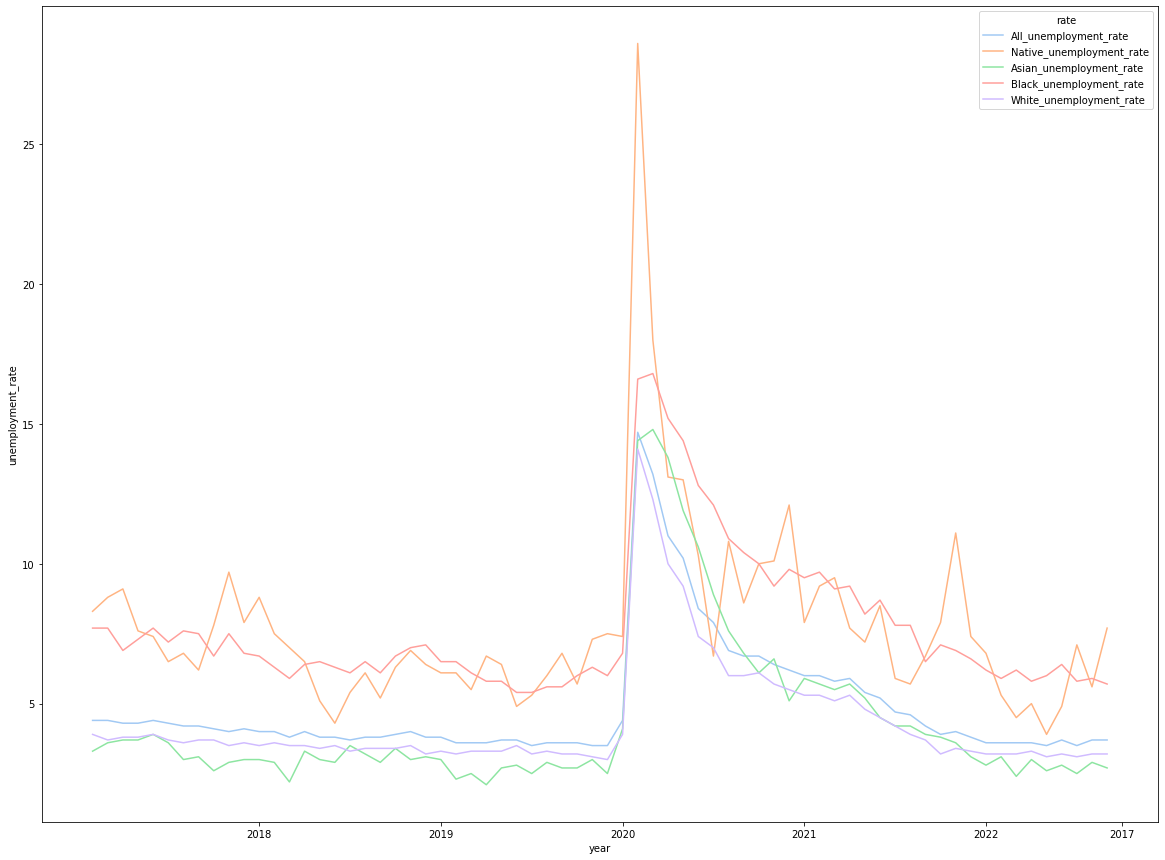

In [ ]:
# plotting graphs to visualize
plt.figure(figsize = (20, 15))
sns.lineplot(x = "year", y = 'unemployment_rate', data = plotting_data_final  , palette = "pastel", hue = 'rate')
plt.xticks(['2017-03-01', '2018-03-01', '2019-03-01','2020-03-01','2021-03-01','2022-03-01'], ['2017', '2018', '2019','2020','2021','2022'])
plt.show()

### Conclusions from EDA

From here we can see that 
1. Sharp spike at start of 2020 - makes sense as covid caused mass unemployment almost all at once.
2. Native American has the highest unemployment rate at 28.6%.

Possible questions to consider: \
shape of the data \
type of data \
scope and time scale of the data \
long term trend \
statistic values (mean, min, max, std, etc.) \
missing values? outliers? \
Distribution visualization \
Possible relationship \
Other analytical questions

## Wages Pulling Data and Analysis

## CPI levels pulling Data and Analysis

Possible models to consider: linear regression, logistic regression, SVM, k-means, ...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


MessageError: ignored

In [ ]:
path = "/content/CPI_level.csv" #upload file and copy the path
CPI_df = pd.read_csv(path)
CPI_df.head(5)


FileNotFoundError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split





In [ ]:
# choose these CPIs to compare as seen as necessity
CPI_order = ['Total_CPI','Energy_CPI','Food and beverages_CPI','Housing_CPI','Medical care_CPI']
CPI_avg_coeff = []
CPI_R2 = []

for i in range(len(CPI_order)):
  sample_model = LinearRegression()
  sample_model.fit(X = CPI_df[['Unnamed: 0']], y = CPI_df[CPI_order[i]])
  CPI_avg_coeff.append(sample_model.coef_)
  CPI_R2.append(sample_model.score(CPI_df[['Unnamed: 0']],CPI_df[CPI_order[i]]))

print(CPI_avg_coeff)
print(CPI_R2)


NameError: ignored

As 'Unnamed: 0' increases (going from present to the past), CPI decreses.
A more negative coefficient means that CPI increases more with time (past to present).

In [ ]:
# Assume worst months of covid was from Jan 2020 to Jun 2020
# Extracting df for that time period only
first_row = CPI_df.loc[CPI_df['date_list'] == '2020-06-01']
index1 = first_row['Unnamed: 0']

last_row = CPI_df.loc[CPI_df['date_list'] == '2020-01-01']
index2 = last_row['Unnamed: 0']

CPI_df_covid = CPI_df.loc[int(index1):int(index2)]

In [ ]:
CPI_covid_coeff = []
CPI_covid_R2 = []

for i in range(len(CPI_order)):
  sample_model = LinearRegression()
  sample_model.fit(X = CPI_df_covid[['Unnamed: 0']], y = CPI_df_covid[CPI_order[i]])
  CPI_covid_coeff.append(sample_model.coef_)
  CPI_covid_R2.append(sample_model.score(CPI_df_covid[['Unnamed: 0']],CPI_df_covid[CPI_order[i]]))

print(CPI_covid_coeff)
print(CPI_covid_R2)

[array([0.26994286]), array([5.44702857]), array([-1.85134286]), array([-0.38148571]), array([-1.7196])]
[0.2825140548029872, 0.6545422909279957, 0.9529199836109126, 0.811859751663936, 0.9981494588501145]


Using R2 value as a gauge of accuracy of linear regression (closer to 1 is better), we compare these consumer price indexes: 'Food and beverages_CPI','Housing_CPI','Medical care_CPI'

Comparing the coeff values, 'Food and beverages_CPI' and 'Medical care_CPI' became more negative, meaning that prices increased faster for that specific period -> More strain on public, especially the unemployed.

In [ ]:
series_dict = {'LEU0202881500' : 'Year','LEU0207577800': 'Annual','LEU0207586700': 'x','LEU0207592400': 'y'}
series_list = list(series_dict.keys())

def pull_data (series_id):
  # Specify json as content type to return
  headers = {'Content-type': 'application/json'}

  # Submit the list of series as data -> this is Nick's registration key 88ccd8fa0c414476b9fa708698f3d536
  data = json.dumps({"seriesid": [series_id],"startyear":"2012", "endyear":"2021", "registrationkey":"c3a94cbd957845a888c5255ff547990a"})

  # Post request for the data
  p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
  # change p into json type for further querying
  json_data = json.loads(p.text)
  
  # query data
  results = json_data["Results"]["series"][0]["data"]
  return results


In [ ]:
df = [pd.DataFrame() for i in range(4)] # range(5) because we have 5 survey IDs selected


data = pd.DataFrame()    # create an empty DataFrame


for j in range(4):
  results = pull_data(series_list[j]) # api call for each survey ID
  for i in np.arange(0,len(results), 1):   # might need to change based on years you choose
    year = results[i]["year"]         
    month = results[i]["period"][1:]  # this is to delete the first letter "M" in every month data
    month_name = results[i]["periodName"]
    date_list = str(year + "-" + month + "-01" )
    unemployment_rate = results[i]["value"]
    df[j] = df[j].append({series_dict.get(series_list[j])+"_median_weekly_wage": unemployment_rate},
                      ignore_index=True)
    if j == 0:
      data = data.append({"date_list": date_list},
                      ignore_index=True)
  
output = [data] + df[:1]
output

[    date_list
 0  2021-01-01
 1  2020-01-01
 2  2019-01-01
 3  2018-01-01
 4  2017-01-01
 5  2016-01-01
 6  2015-01-01
 7  2014-01-01
 8  2013-01-01
 9  2012-01-01,   Year_median_weekly_wage
 0                     886
 1                     863
 2                     797
 3                     764
 4                     740
 5                     715
 6                     695
 7                     679
 8                     665
 9                     655]

In [ ]:
# use concat to combine the arrays in "output"
final_data = pd.concat(output, ignore_index=False, axis=1) # axis=1 to concat by columns; ignore_index=False to preserve the head of each column
final_data


,date_list,Year_median_weekly_wage
0,2021-01-01,886
1,2020-01-01,863
2,2019-01-01,797
3,2018-01-01,764
4,2017-01-01,740
5,2016-01-01,715
6,2015-01-01,695
7,2014-01-01,679
8,2013-01-01,665
9,2012-01-01,655


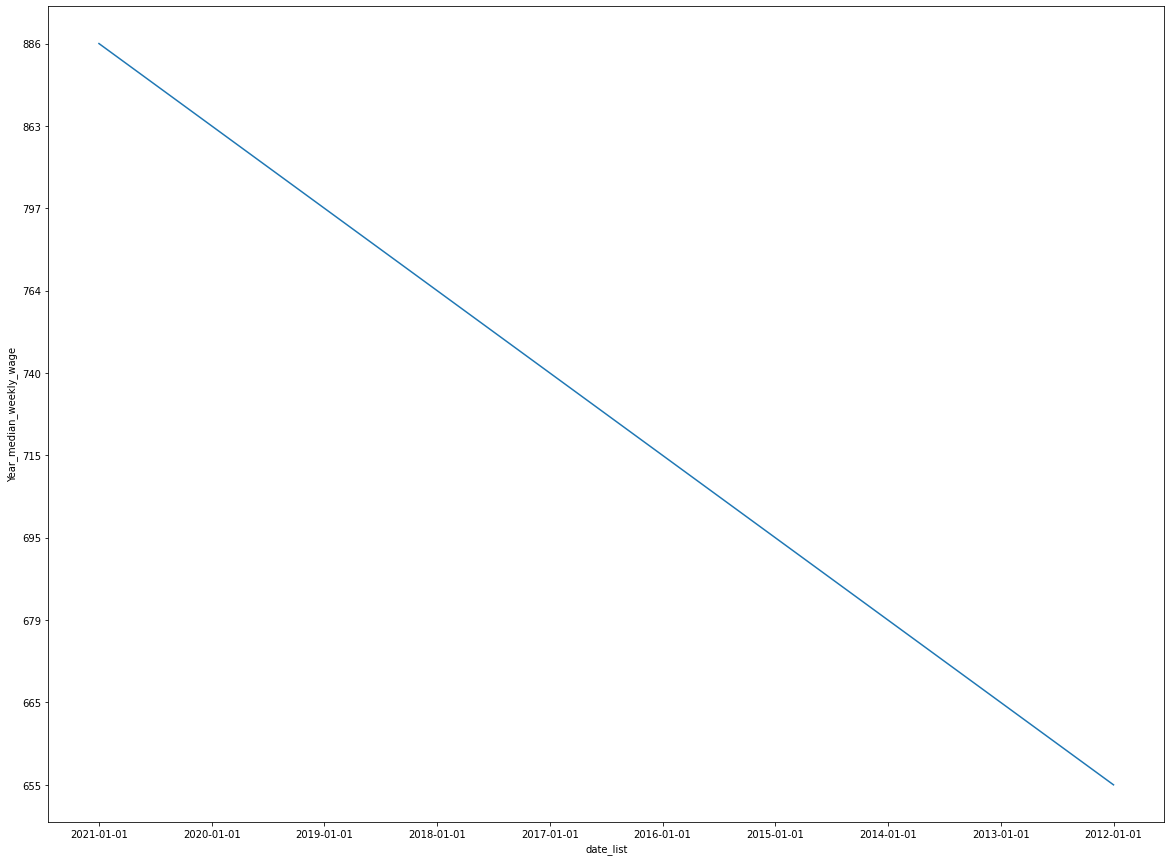

In [ ]:
#plotting graphs to visualize
plt.figure(figsize = (20, 15))
sns.lineplot(x = "date_list", y = 'Year_median_weekly_wage', data = final_data, palette = "pastel")
plt.show()

The weekly wages increased every single year in a linear pattern. Based on this data, we can infer that average inflation rates of 3.29% have caused weekly wages to go up at a steady rate over the course 8-9 years in a linear pattern. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split





sample_model = LinearRegression()
sample_model.fit(X = CPI_df[['Unnamed: 0']], y = CPI_df[CPI_order[i]])
CPI_avg_coeff.append(sample_model.coef_)
CPI_R2.append(sample_model.score(CPI_df[['Unnamed: 0']],CPI_df[CPI_order[i]]))



# Assume worst months of covid was from Jan 2020 to Jun 2020
# Extracting df for that time period only
first_row = CPI_df.loc[CPI_df['date_list'] == '2020-06-01']
index1 = first_row['Unnamed: 0']

last_row = CPI_df.loc[CPI_df['date_list'] == '2020-01-01']
index2 = last_row['Unnamed: 0']

CPI_df_covid = CPI_df.loc[int(index1):int(index2)]

CPI_covid_coeff = []
CPI_covid_R2 = []

for i in range(len(CPI_order)):
  sample_model = LinearRegression()
  sample_model.fit(X = CPI_df_covid[['Unnamed: 0']], y = CPI_df_covid[CPI_order[i]])
  CPI_covid_coeff.append(sample_model.coef_)
  CPI_covid_R2.append(sample_model.score(CPI_df_covid[['Unnamed: 0']],CPI_df_covid[CPI_order[i]]))

print(CPI_covid_coeff)
print(CPI_covid_R2)

NameError: ignored